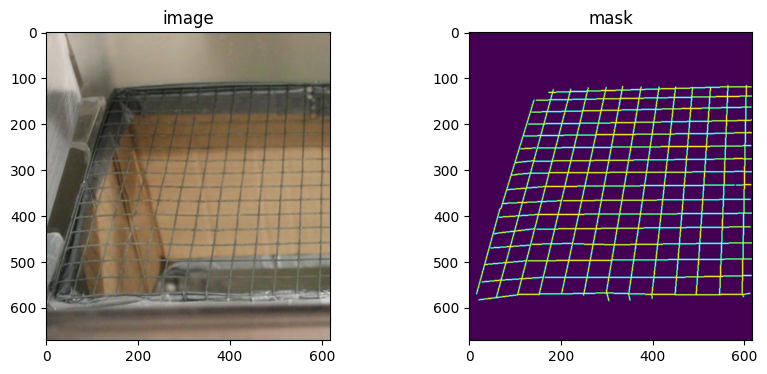

In [14]:
from skimage.io import imread
from pathlib import Path
from matplotlib import pyplot as plt
from tnia.plotting.plt_helper import imshow_multi2d
import napari
import numpy as np
from tnia.deeplearning.dl_helper import quantile_normalization


tnia_images_path = Path("D:/images/tnia-python-images")
parent_path=Path(tnia_images_path / r'imagesc/2024_05_03_mouse_and_grid')
label_path = Path(parent_path / r'labels')
image_path = Path(label_path / r'inputs')
mask_path = Path(label_path / r'ground truth')

name = '6AMAH2b-left'
ext = '.png'


image = imread(str(image_path/ (name + ext)))
mask = imread(str(mask_path / (name+".tif")))

mask[mask>0] = 1
expanded_mask = np.zeros([image.shape[0], image.shape[1]], dtype=np.uint8)

# Copy the `mask` data into the new array
expanded_mask[:mask.shape[0], :mask.shape[1]] = mask

from skimage.morphology import dilation, disk
mask = dilation(expanded_mask, disk(1))

fig = imshow_multi2d([image, mask], ["image", "mask"], 1, 2)

In [15]:
import napari
viewer = napari.Viewer()
viewer.add_image(image, name='image')
viewer.add_labels(mask, name='mask')

<Labels layer 'mask' at 0x1a408b9e560>

In [16]:
image.shape, mask.shape

((671, 618, 3), (671, 618))

## Normalize image here

In [17]:
image = quantile_normalization(image).astype(np.float32)

In [18]:
image.shape, mask.shape, image.dtype, mask.dtype

((671, 618, 3), (671, 618), dtype('float32'), dtype('uint8'))

In [21]:
import os
from tnia.deeplearning.augmentation import uber_augmenter

patch_path= parent_path / 'patches' 

if not os.path.exists(patch_path):
    os.mkdir(patch_path)
axes = 'YXC'
sub_sample = 1

#uber_augmenter(image, labels, patch_path, 'eyes', 256, 500, do_random_gamma=True, do_color_jitter=True)


uber_augmenter(image, mask, patch_path, 'grid', 256, 200, do_random_gamma=True, do_color_jitter=True)



c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deeplearning\augmentation.py:198: UserWarning: D:\images\tnia-python-images\imagesc\2024_05_03_mouse_and_grid\patches\ground truth0/grid_203.tif is a low contrast image
  imsave(patch_name, label_aug)
c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deeplearning\augmentation.py:198: UserWarning: D:\images\tnia-python-images\imagesc\2024_05_03_mouse_and_grid\patches\ground truth0/grid_204.tif is a low contrast image
  imsave(patch_name, label_aug)
c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deeplearning\augmentation.py:198: UserWarning: D:\images\tnia-python-images\imagesc\2024_05_03_mouse_and_grid\patches\ground truth0/grid_205.tif is a low contrast image
  imsave(patch_name, label_aug)
c:\users\bnort\work\imagej2022\tnia\tnia-python\tnia\deeplearning\augmentation.py:198: UserWarning: D:\images\tnia-python-images\imagesc\2024_05_03_mouse_and_grid\patches\ground truth0/grid_206.tif is a low contrast image
  imsave(patch_n